# Machine Learning for Cyber Attacks


The aim of this project is to classify a network flow as a benign(harmless) or  web attack.
CICIDS2017 dataset contains benign and the most up-to-date common attacks, which resembles the true real-world data (PCAPs).
The dataset used for this project can be found [here](https://www.unb.ca/cic/datasets/ids-2017.html)

## 1 Data Input, EDA and Preparation


The dataset contains 78 features and 170366 Observations.The labels are imbalanced. After raw data input, data exploration showed irregularities in column names. The column names had trailing spaces that affected data subsettiing with column names, this was resolved using the pandas str.strip() method.
The dataset column names contains a lot of messy data, model fitting with raw data is impossible due to value errors. Some columns contained null and infinite values, these errors were fixed using numpy and pandas. The infinite values and null values were replaced with 0. The features had no categorical column, however the numerical columns had huge values so scaling would be done, this would improve model learning and reduce memory consumption.
The target column (Label), which represented the network flow classes (4) as Benign(harmless) , Web attack Bruteforce, XSS or SQL Injection. The various Web attack classes were grouped as Web Attack. Label Encoding was carried out on the target column to represent the 2 classes as numerical values that the model can understand.

##### Library Import

In [1]:
##### Libraries for Data manipulation and processing
import pandas as pd
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None, 'display.max_columns', None)

import numpy as np 
import warnings
warnings.filterwarnings('ignore')

# Libraries for visualization
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


from datetime import datetime as dt

# Libraries for modeling and pre-modeling processing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, recall_score,\
auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



##### Data Import

In [2]:
initial_df = pd.read_csv('MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

##### View Data Information

In [3]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170366 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             170366 non-null  int64  
 1    Flow Duration                170366 non-null  int64  
 2    Total Fwd Packets            170366 non-null  int64  
 3    Total Backward Packets       170366 non-null  int64  
 4   Total Length of Fwd Packets   170366 non-null  int64  
 5    Total Length of Bwd Packets  170366 non-null  int64  
 6    Fwd Packet Length Max        170366 non-null  int64  
 7    Fwd Packet Length Min        170366 non-null  int64  
 8    Fwd Packet Length Mean       170366 non-null  float64
 9    Fwd Packet Length Std        170366 non-null  float64
 10  Bwd Packet Length Max         170366 non-null  int64  
 11   Bwd Packet Length Min        170366 non-null  int64  
 12   Bwd Packet Length Mean       170366 non-nul

##### View Data Sample

In [4]:
initial_df.sample(5)

Destination Port   Flow Duration   Total Fwd Packets  \
84667               34198             577                   1   
106271                443           11907                   1   
112223                443         1026111                   7   
127029                443          124044                   9   
102159                 80        42904437                   8   

         Total Backward Packets  Total Length of Fwd Packets  \
84667                         1                            0   
106271                        1                            6   
112223                       10                         1335   
127029                        7                          557   
102159                        9                          466   

         Total Length of Bwd Packets   Fwd Packet Length Max  \
84667                              0                       0   
106271                             6                       6   
112223                          4023                     674   
127029                          5225                     196   
102159                          1818                     430   

         Fwd Packet Length Min   Fwd Packet Length Mean  \
84667                        0                 0.000000   
106271                       6                 6.000000   
112223                       0               190.714286   
127029                       0                61.888889   
102159                       0                58.250000   

         Fwd Packet Length Std  ...   min_seg_size_forward  Active Mean  \
84667                 0.000000  ...                     32         0.00   
106271                0.000000  ...                     20         0.00   
112223              283.709190  ...                     20         0.00   
127029               81.643194  ...                     20         0.00   
102159              150.224356  ...                     20     76609.75   

         Active Std   Active Max   Active Min   Idle Mean     Idle Std  \
84667       0.00000            0            0         0.0     0.000000   
106271      0.00000            0            0         0.0     0.000000   
112223      0.00000            0            0         0.0     0.000000   
127029      0.00000            0            0         0.0     0.000000   
102159  79185.49623       195387        36769  10000000.0  1991.886271   

         Idle Max   Idle Min   Label  
84667           0          0  BENIGN  
106271          0          0  BENIGN  
112223          0          0  BENIGN  
127029          0          0  BENIGN  
102159   10000000    9999307  BENIGN  

[5 rows x 79 columns]

##### View Data shape

In [5]:
initial_df.shape

(170366, 79)

##### Feature Data types

In [6]:
initial_df.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object

##### Format Column names

In [7]:
# Remove trailing spaces
initial_df.columns = initial_df.columns.str.strip()

In [8]:
initial_df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

##### View target distribution

In [9]:
initial_df['Label'].value_counts()

BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name: Label, dtype: int64

<AxesSubplot:title={'center':'Target Distribution'}>

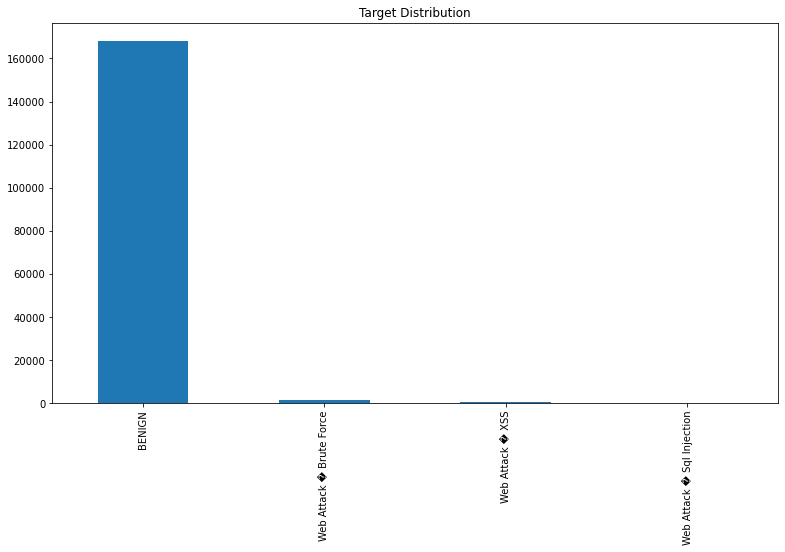

In [10]:
plt.figure(figsize=(13,7))
plt.title('Target Distribution')
initial_df['Label'].value_counts().plot(kind='bar')

#####  Combine all type of Web attacks as Web attack

Since the distribution of taget variables is so imbalanced, model will perform better detecting web attack as a group than detecting individual attack types.

In [11]:
initial_df['Label'] = initial_df['Label'].apply(lambda x: x if x == 'BENIGN' else 'Web Attack')

In [12]:
initial_df['Label'].value_counts()

BENIGN        168186
Web Attack      2180
Name: Label, dtype: int64

##### View target distribution

<AxesSubplot:title={'center':'Target Distribution'}>

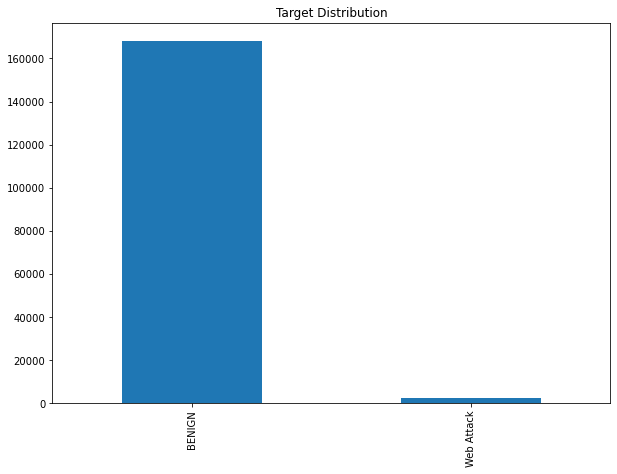

In [13]:
plt.figure(figsize=(10,7))
plt.title('Target Distribution')
initial_df['Label'].value_counts().plot(kind='bar')

##### Get statistical information of dataset

Observations: Some columns have very large maximum value and low minimum values.

In [14]:
initial_df.describe()

Destination Port  Flow Duration  Total Fwd Packets  \
count     170366.000000   1.703660e+05      170366.000000   
mean        7897.090599   1.246354e+07          15.124620   
std        18235.489428   3.193852e+07        1123.107756   
min            0.000000  -1.000000e+00           1.000000   
25%           53.000000   1.920000e+02           1.000000   
50%           80.000000   3.141200e+04           2.000000   
75%          443.000000   8.169818e+05           4.000000   
max        65529.000000   1.200000e+08      200755.000000   

       Total Backward Packets  Total Length of Fwd Packets  \
count           170366.000000                 1.703660e+05   
mean                18.022276                 5.569859e+02   
std               1494.492871                 7.710431e+03   
min                  0.000000                 0.000000e+00   
25%                  1.000000                 3.100000e+01   
50%                  2.000000                 6.800000e+01   
75%                  2.000000                 1.480000e+02   
max             270686.000000                 1.197199e+06   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
count                 1.703660e+05          170366.000000   
mean                  3.183147e+04             167.775982   
std                   3.460816e+06             461.299214   
min                   0.000000e+00               0.000000   
25%                   6.000000e+00              23.000000   
50%                   1.340000e+02              41.000000   
75%                   3.280000e+02              60.000000   
max                   6.270000e+08           23360.000000   

       Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
count          170366.000000           170366.000000          170366.000000   
mean               22.697786               48.233250              47.235628   
std                37.990783               94.947821             141.927429   
min                 0.000000                0.000000               0.000000   
25%                 0.000000                7.882314               0.000000   
50%                 6.000000               38.000000               0.000000   
75%                41.000000               50.000000              17.897858   
max              1729.000000             4183.057143            5463.493850   

       ...  act_data_pkt_fwd  min_seg_size_forward   Active Mean  \
count  ...     170366.000000         170366.000000  1.703660e+05   
mean   ...         11.925108             25.584506  7.433804e+04   
std    ...       1077.898793              6.354041  6.182048e+05   
min    ...          0.000000              0.000000  0.000000e+00   
25%    ...          0.000000             20.000000  0.000000e+00   
50%    ...          1.000000             20.000000  0.000000e+00   
75%    ...          3.000000             32.000000  0.000000e+00   
max    ...     192491.000000             60.000000  1.030000e+08   

         Active Std    Active Max    Active Min     Idle Mean      Idle Std  \
count  1.703660e+05  1.703660e+05  1.703660e+05  1.703660e+05  1.703660e+05   
mean   4.676038e+04  1.646422e+05  5.012699e+04  3.690478e+06  1.310724e+05   
std    3.689605e+05  9.958673e+05  5.606797e+05  1.298830e+07  1.733767e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    6.370000e+07  1.030000e+08  1.030000e+08  1.200000e+08  7.260000e+07   

           Idle Max      Idle Min  
count  1.703660e+05  1.703660e+05  
mean   3.784764e+06  3.543232e+06  
std    1.325135e+07  1.284183e+07  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  
max    1.200000e+08  1.

##### Label Encoding

Observation: harmless network flows are labelled 0 and web attacks are labeled 1

In [15]:
ord_enc = OrdinalEncoder()
initial_df["Label_code"] = ord_enc.fit_transform(initial_df[["Label"]])

In [16]:
initial_df["Label_code"].value_counts()

0.0    168186
1.0      2180
Name: Label_code, dtype: int64

<AxesSubplot:title={'center':'Encoded Target Distribution'}>

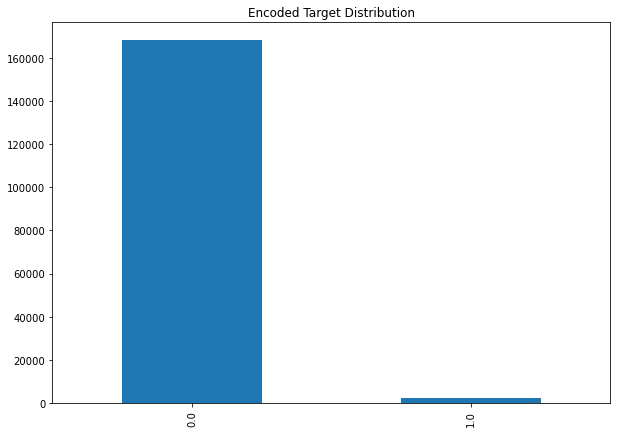

In [17]:
plt.figure(figsize=(10,7))
plt.title('Encoded Target Distribution')
initial_df['Label_code'].value_counts().plot(kind='bar')

### Experiment 1 - 1.2 Initial modeling on Raw data

This is done to compare model performance before data normalization and feature reduction.

Observation: model cannot fit to raw data as a result of presence of infinite values and values too large for float32. More data processing to remove infinite values and scale values will be carried out

In [18]:
features = initial_df.columns.to_list()
features.remove('Label')
features.remove('Label_code')

In [19]:
X = initial_df[features]
Y = initial_df["Label_code"]

In [20]:
#set stratify=Y because the target values are not evenly distributed
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0, stratify=Y)

In [21]:
#Fitting Random forest classification to training set
RFclassifier = RandomForestClassifier( n_estimators = 100,criterion= 'entropy')
RFclassifier.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## 2.1  Data processing, Feature Reduction and Model Training

In this stage, the cleaned data is explored, corrrelation analysis is used for feature reduction because the dataset is quite large to avoid overfitting, reduce model run time and computational power required, normalization is carried out on all features, dataset is split and model fitting, making predictions and model performance testing is carried out.

#### Data Preparation (Cont'd)

#####  Fix null and infinity values

In [21]:
# Replace infinity values with null
initial_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Fill null with 
initial_df.fillna(0, inplace=True)

#####  Copy data

In [22]:
df = initial_df.copy()
del initial_df

#### Experiment 2 - Modeling on Full Dataset

In [23]:
# To create a results dataframe to save and compare results for each ML model
experiment2 = pd.DataFrame()

experiment2['Metrics'] = ['True Negatives', 'False Negatives', 'False Positives', 'True Positives', 'Accuracy',\
                      'Precision', 'Recall', 'F1-Score', 'Support']
experiment2['Experiment'] = 'Experiment 2'

def get_accuracy_metrics(labels, pred_labels):
    '''
    This function computes accuracy metrics for a given test and predicted label value.
    labels: Test values
    pred_labels: Predicted values
    '''
    conf_matrix = np.asarray(confusion_matrix(labels, pred_labels))
    metrics = np.concatenate(([accuracy_score(labels, pred_labels)], precision_recall_fscore_support(labels, pred_labels, average='binary')))
    return np.concatenate((conf_matrix.reshape(-1),metrics))


In [24]:
b_time1 = ['runtime(sec)']

In [25]:
features = df.columns.to_list()
features.remove('Label')
features.remove('Label_code')
X = df[features]
Y = df['Label_code']

##### Split scaled dataset into train and test set
Set stratify=Y because the target values are not evenly distributed

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0, stratify=Y)

##### Ensemble model using Random Forest Clasifier

In [27]:
RFclassifier1 = RandomForestClassifier(n_estimators = 100,criterion= 'entropy',class_weight='balanced_subsample')

# Initialize time counter
start = dt.now()

#Fitting Random forest classification to training set
RFclassifier1.fit(X_train, Y_train)

buildtime1 = (dt.now() - start).seconds

In [28]:
# Predicting Test set results
Y_pred_rf1 = RFclassifier1.predict(X_test)

# Evaluate model
print(f'Random Forest Accuracy score: {round(accuracy_score(Y_test, Y_pred_rf1),4)}')

Random Forest Accuracy score: 0.9998


In [29]:
experiment2['Random Forest'] = get_accuracy_metrics(Y_test, Y_pred_rf1)
b_time1.append(buildtime1)

##### Decision Tree Classifier

In [30]:
DTclassifier1 = DecisionTreeClassifier(criterion='entropy', random_state=0, class_weight='balanced')

start = dt.now()

# Fitting Decision Tree Algorithm to Training set
DTclassifier1.fit(X_train, Y_train)

buildtime1 = (dt.now() - start).seconds

In [31]:
#Predict Target values for test features
Y_pred_dt = DTclassifier1.predict(X_test)

# Evaluate model
print(f'Decision Tree Accuracy score: {round(accuracy_score(Y_test, Y_pred_dt),4)}')

Decision Tree Accuracy score: 0.9999


In [32]:
experiment2['Decision Tree'] = get_accuracy_metrics(Y_test, Y_pred_dt)
b_time1.append(buildtime1)

##### Logistic Regression Model

In [33]:
LRclassifier1 = LogisticRegression(random_state = 0, solver = 'lbfgs', class_weight='balanced')

start = dt.now()
# Fitting Logist regression Algorithm to Training set
LRclassifier1.fit(X_train, Y_train)

buildtime1 = (dt.now() - start).seconds

In [34]:
# Predict
Y_pred_lr = LRclassifier1.predict(X_test)

# Evaluate model
print(f'Logistic Regression Accuracy score: {round(accuracy_score(Y_test, Y_pred_lr),4)}')

Logistic Regression Accuracy score: 0.9741


In [35]:
experiment2['Logistic Regression'] = get_accuracy_metrics(Y_test, Y_pred_lr)
b_time1.append(buildtime1)

In [36]:
b_time1

['runtime(sec)', 25, 2, 3]

In [37]:
fp, tp, thresholds = roc_curve(Y_test, Y_pred_lr)
fp2, tp2, thresholds2 = roc_curve(Y_test, Y_pred_dt)
fp4, tp4, thresholds4 = roc_curve(Y_test, Y_pred_rf1)

In [38]:
del thresholds,thresholds2,thresholds4,LRclassifier1,DTclassifier1,RFclassifier1

### Correlation Analysis

Correlation explains how one or more variables are related to each other. The dataset contains 79 input data features. In order to reduce the features, features that are highly correlated (correlation > 0.7) will be replaced with a single feature. Since the input features have aggregates, to make visualization easier the features with same aggregate type will be checked together.

In [39]:
# Set plot size
plt.rcParams['figure.figsize'] = (15, 15)

In [40]:
features = df.columns.to_list()

##### Function Definition

In [41]:
# Visualize correlation calculated with pandas corr function using seaborn heatmap
def plot_corr(cols: list,df=df):
    plt.rcParams['figure.figsize'] = (15, 15)
    sns.heatmap( df[cols].corr(), cmap="YlGnBu", annot=True)
    plt.show()
    
# Drop redundant columns in dataset
def drop_cols(cols_to_drop: list):
    for col in cols_to_drop:
        try:
            features.remove(col)
        except ValueError:
            print(f'Unable to remove {col}')

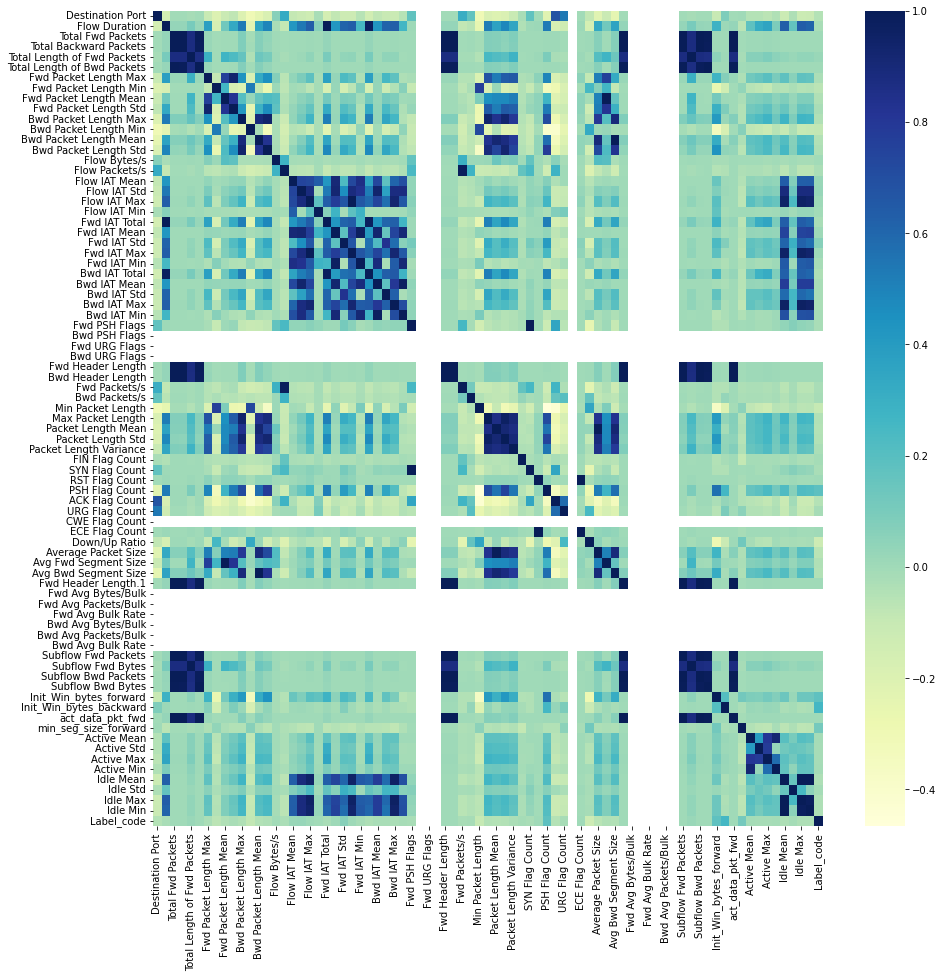

In [42]:
plt.rcParams['figure.figsize'] = (15, 15)
sns.heatmap( df[features].corr(), cmap="YlGnBu", annot=False)
plt.show()

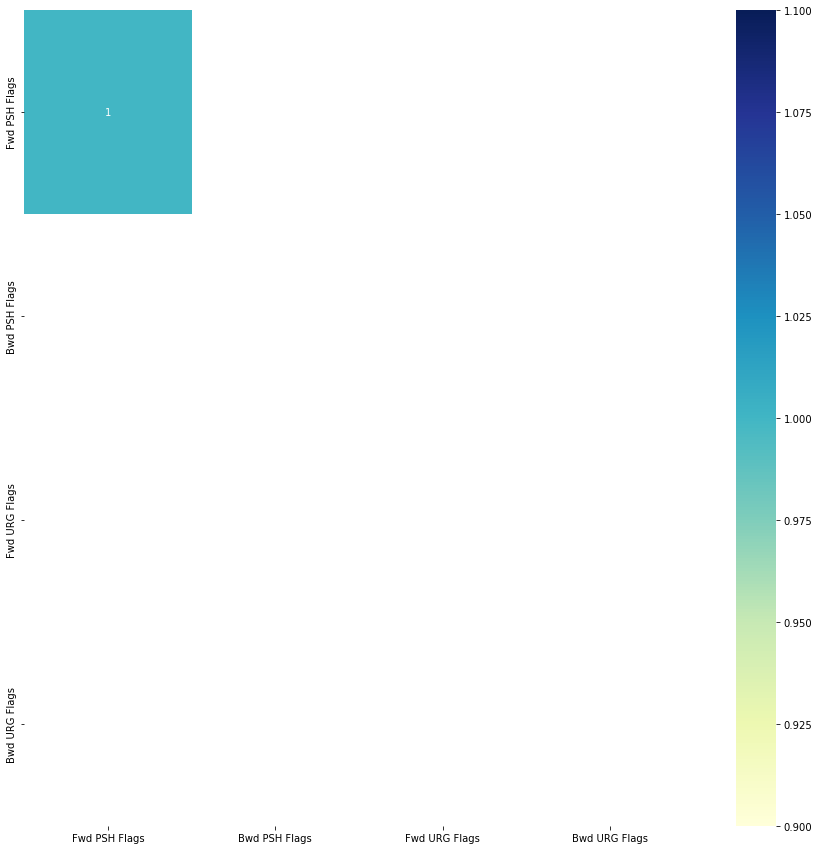

In [43]:
# Check correlation in columns that have flags in them
cols = [x for x in df.columns if 'Flags' in x]

plot_corr(cols)

In [44]:
# Remove columns that have corr > 0.7 in heatmap
cols_to_drop=['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags']
drop_cols(cols_to_drop )

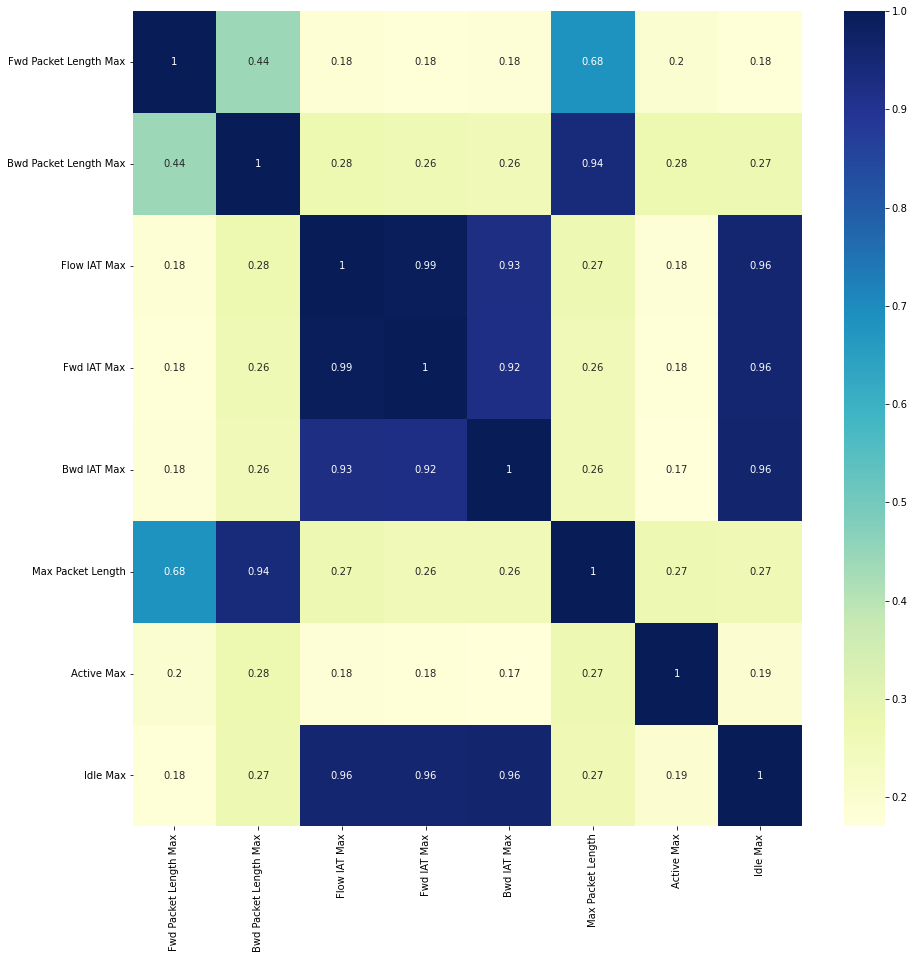

In [45]:
# Check correlation in aggregated max columns
cols = [x for x in df.columns if 'Max' in x]

plot_corr(cols)

In [46]:
# Remove columns that have corr > 0.7 in heatmap
cols_to_drop=['Bwd Packet Length Max','Fwd IAT Max','Bwd IAT Max','Idle Max']
drop_cols(cols_to_drop)

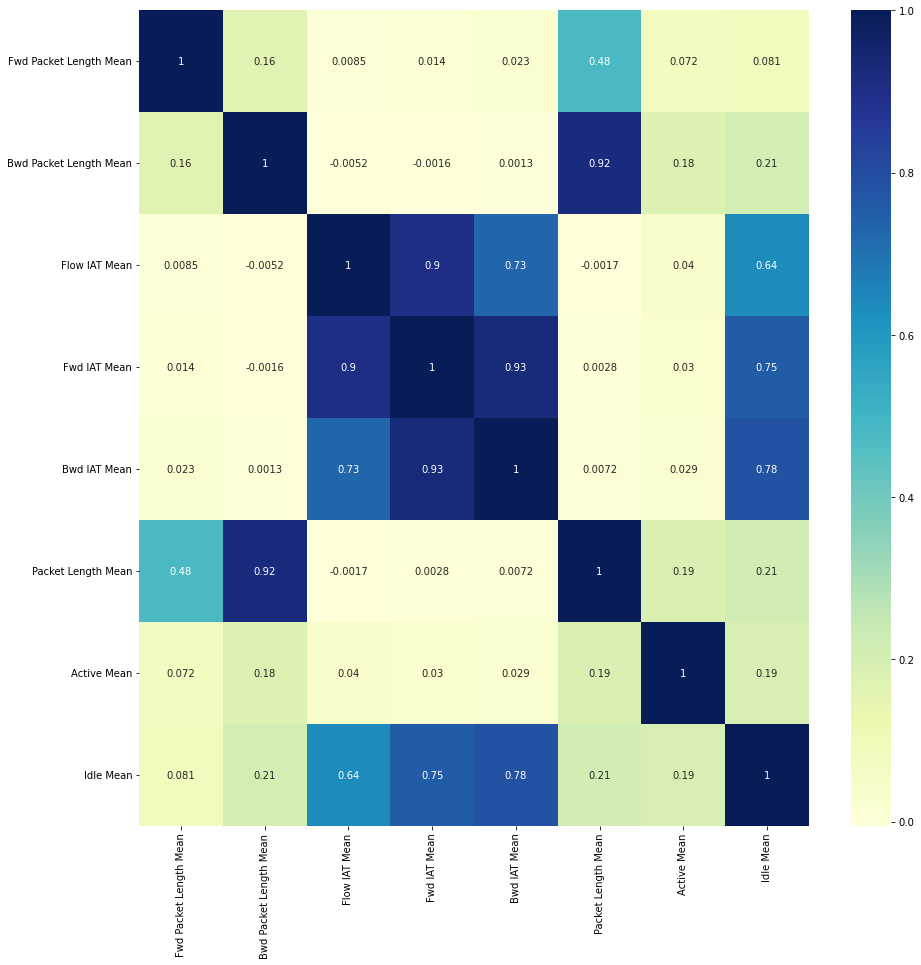

In [47]:
# Check correlation in aggregated mean columns
cols = [x for x in df.columns if 'Mean' in x]

plot_corr(cols)

In [48]:
# Remove columns that have corr > 0.7 in heatmap
cols_to_drop=['Bwd Packet Length Mean','Fwd IAT Mean','Bwd IAT Mean']
drop_cols(cols_to_drop)

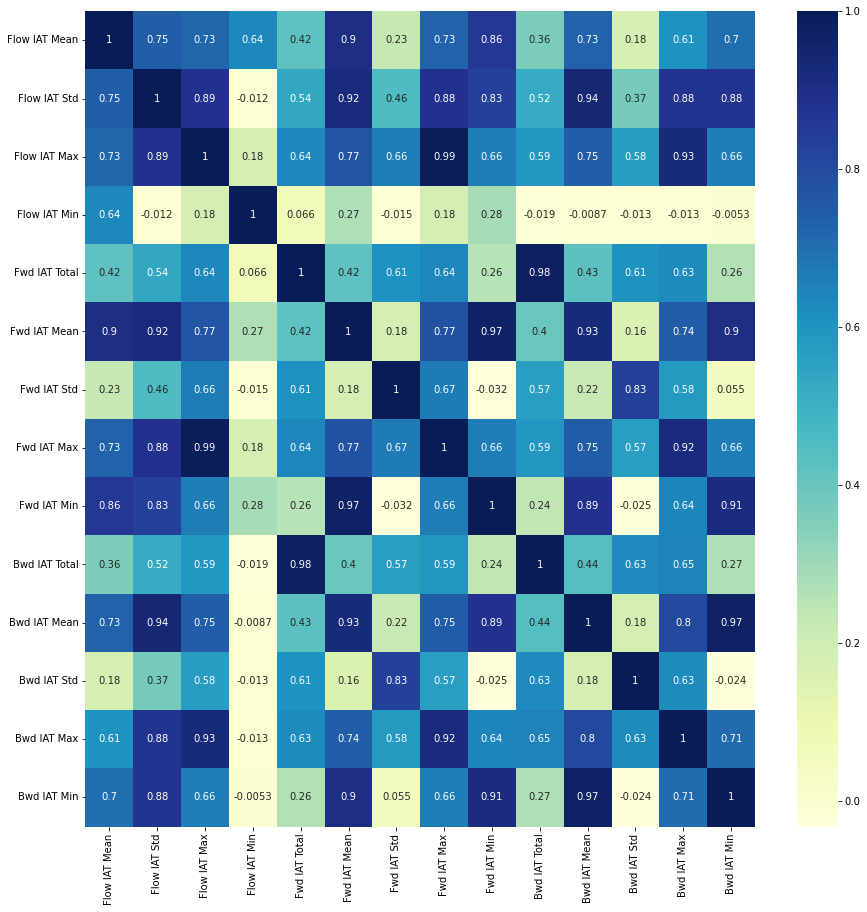

In [49]:
# Check correlation in columns that contain IAT
cols = [x for x in df.columns if 'IAT' in x]

plot_corr(cols)

In [50]:
# Remove columns that have corr > 0.7 in heatmap
cols_to_drop=['Fwd IAT Std','Bwd IAT Min','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Bwd IAT Total','Fwd IAT Total']
drop_cols(cols_to_drop)

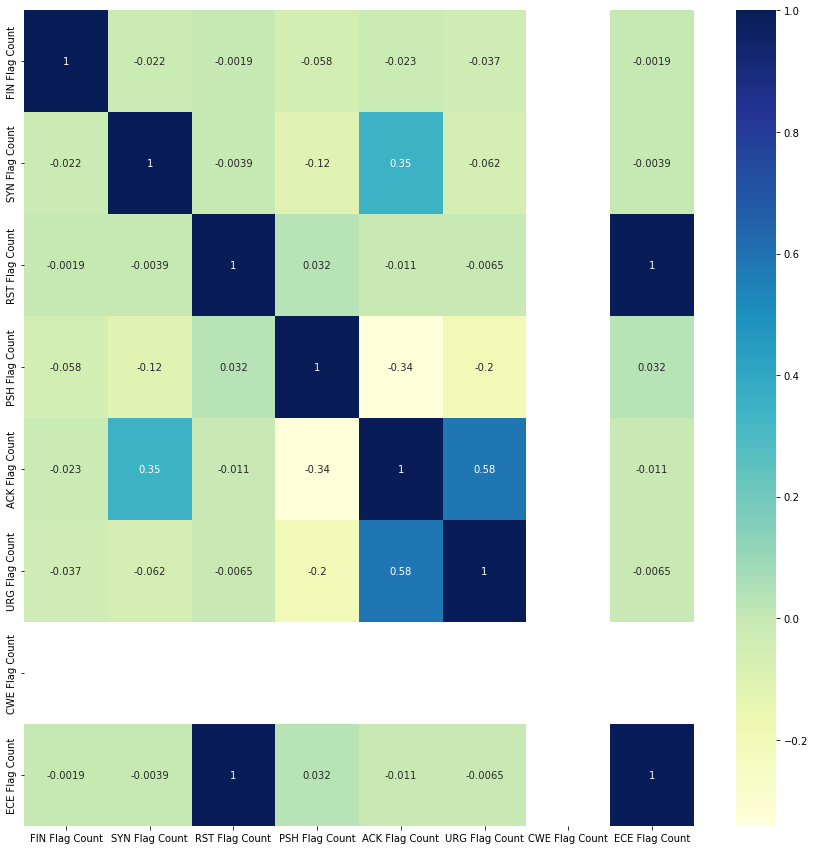

In [51]:
# Check correlation in aggregated count columns
cols = [x for x in df.columns if 'Count' in x]

plot_corr(cols)

In [52]:
# Remove columns that have corr > 0.7 in heatmap
cols_to_drop=['CWE Flag Count','ECE Flag Count']
drop_cols(cols_to_drop)

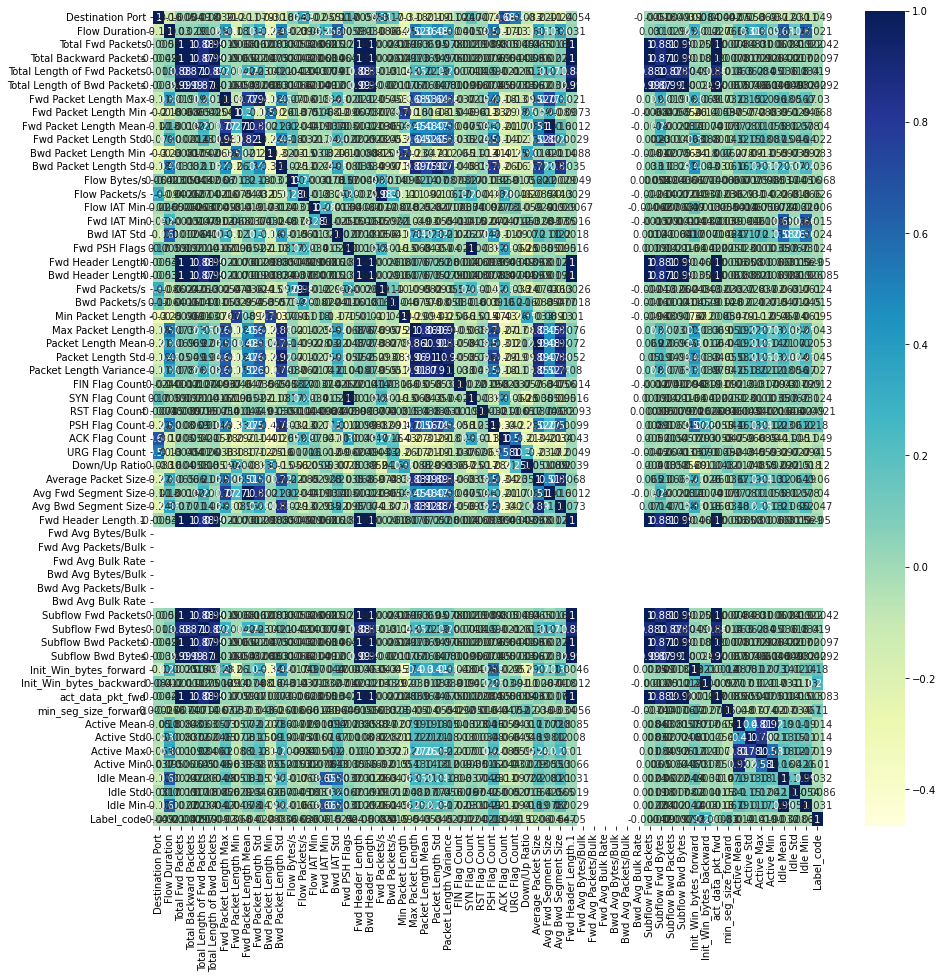

In [53]:
plot_corr(features)

In [54]:
cols_to_drop=['Fwd Avg Bytes/Bulk','Fwd Avg Packets/Bulk','Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',\
              'Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate']
drop_cols(cols_to_drop)

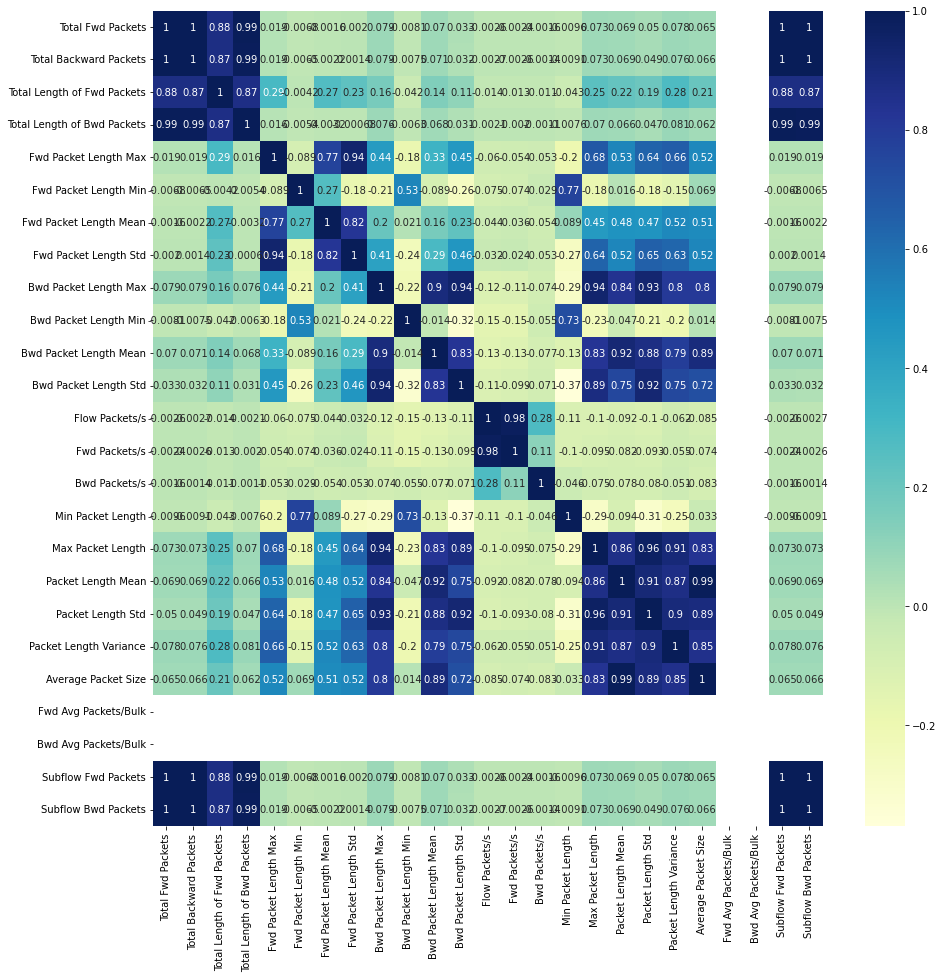

In [55]:
# Check correlation in aggregated count columns
cols = [x for x in df.columns if 'Packet' in x]

plot_corr(cols)

In [56]:
cols_to_drop=['Total Length of Bwd Packets','Fwd Header Length','Bwd Header Length','Fwd Header Length.1', \
'Fwd Packet Length Min','Fwd Packet Length Std','Packet Length Variance','Max Packet Length',\
 'Packet Length Mean','Fwd Packet Length Max','Bwd Packet Length Min']
drop_cols(cols_to_drop)

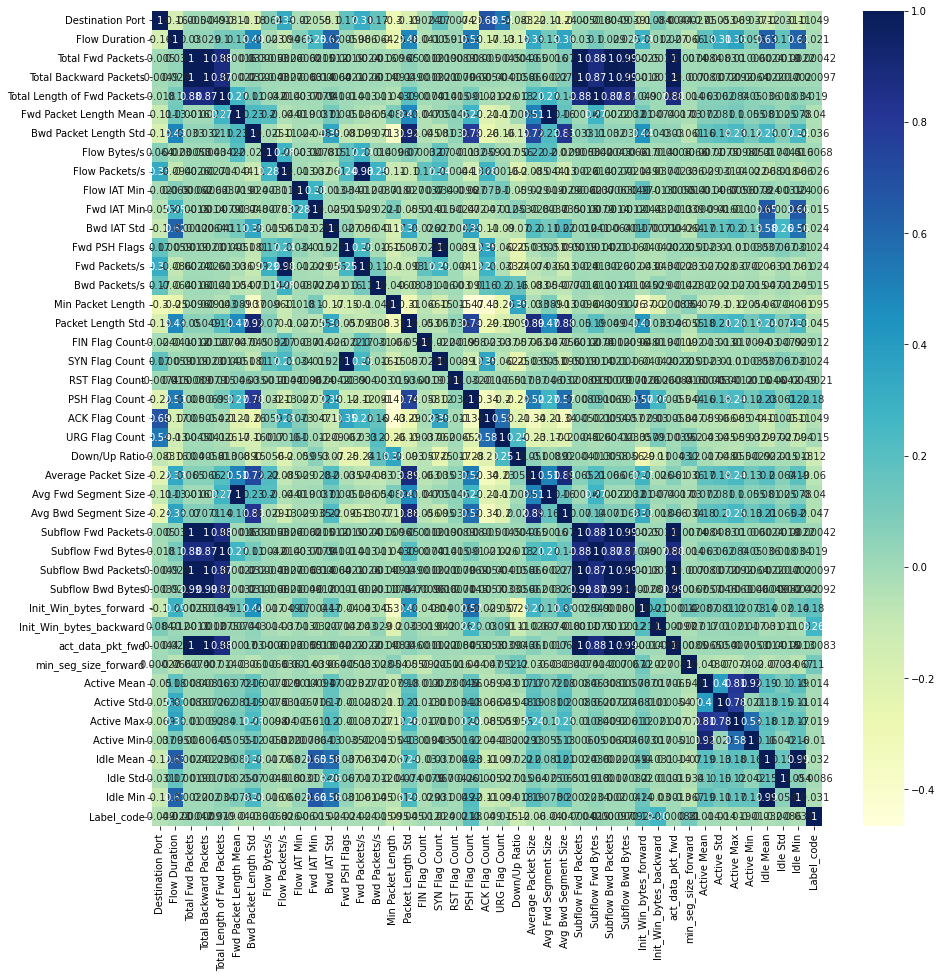

In [57]:
plot_corr(features)

In [58]:
cols_to_drop = ['Total Backward Packets','Total Length of Fwd Packets']
drop_cols(cols_to_drop)

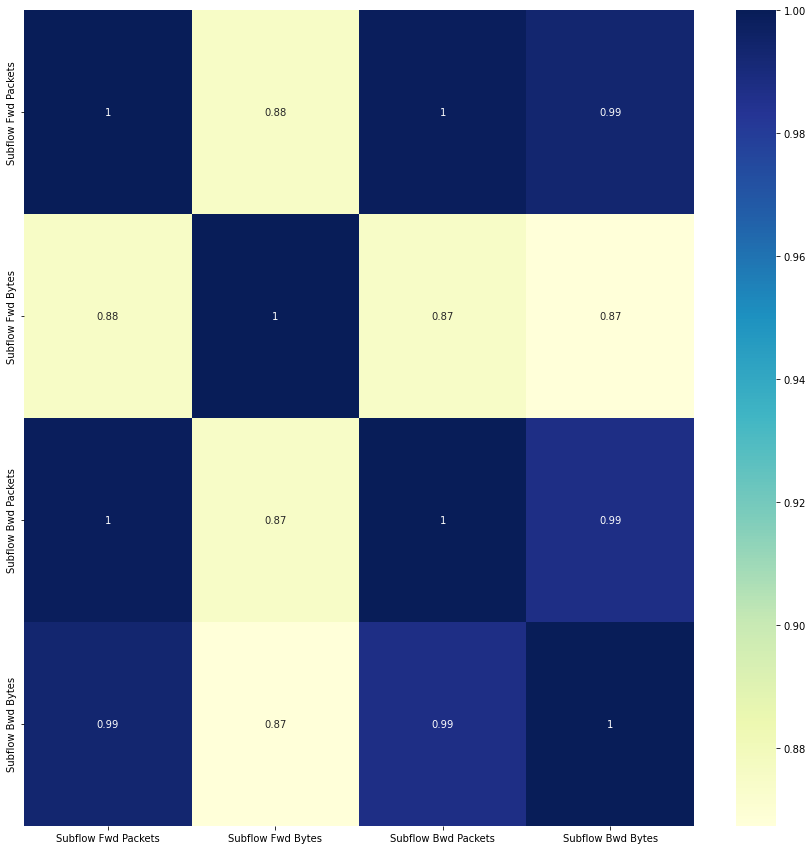

In [59]:
# Check correlation in aggregated count columns
cols = [x for x in df.columns if 'Subflow' in x]

plot_corr(cols)

In [60]:
cols_to_drop=['Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets']
drop_cols(cols_to_drop)

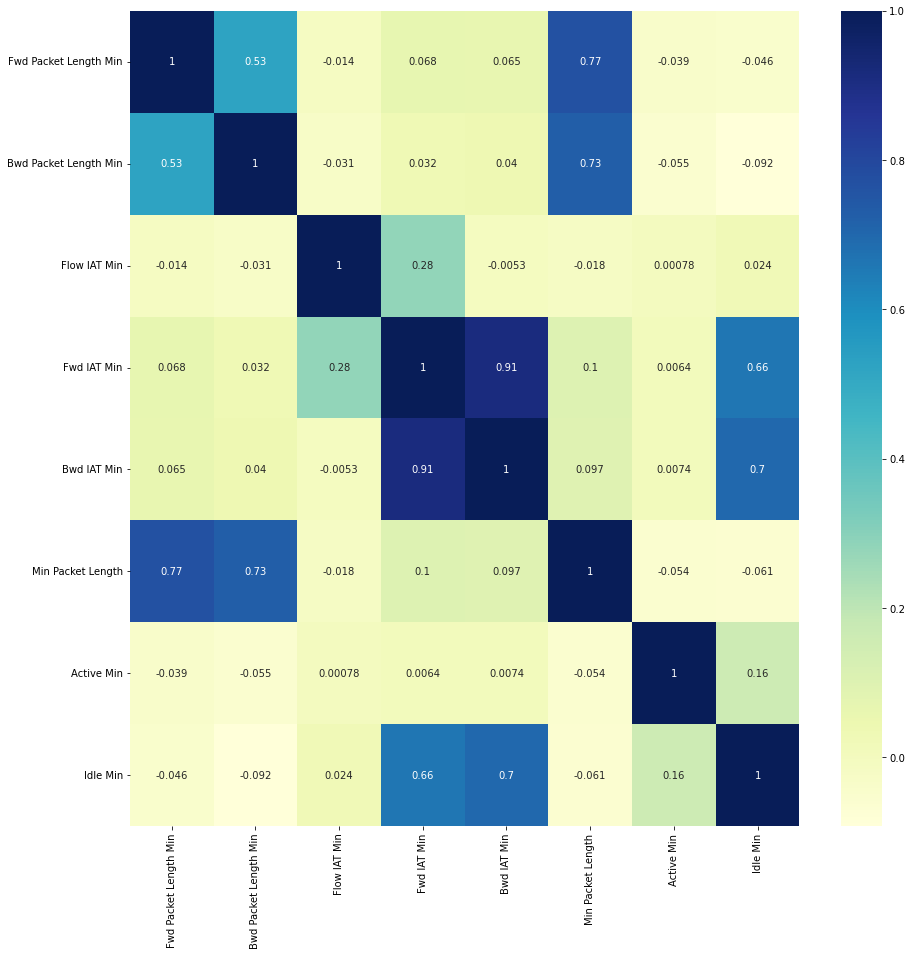

In [61]:
# Check correlation in aggregated count columns
cols = [x for x in df.columns if 'Min' in x]

plot_corr(cols)

In [62]:
cols_to_drop= ['Min Packet Length','Bwd IAT Min','Idle Min']
drop_cols(cols_to_drop)

Unable to remove Bwd IAT Min


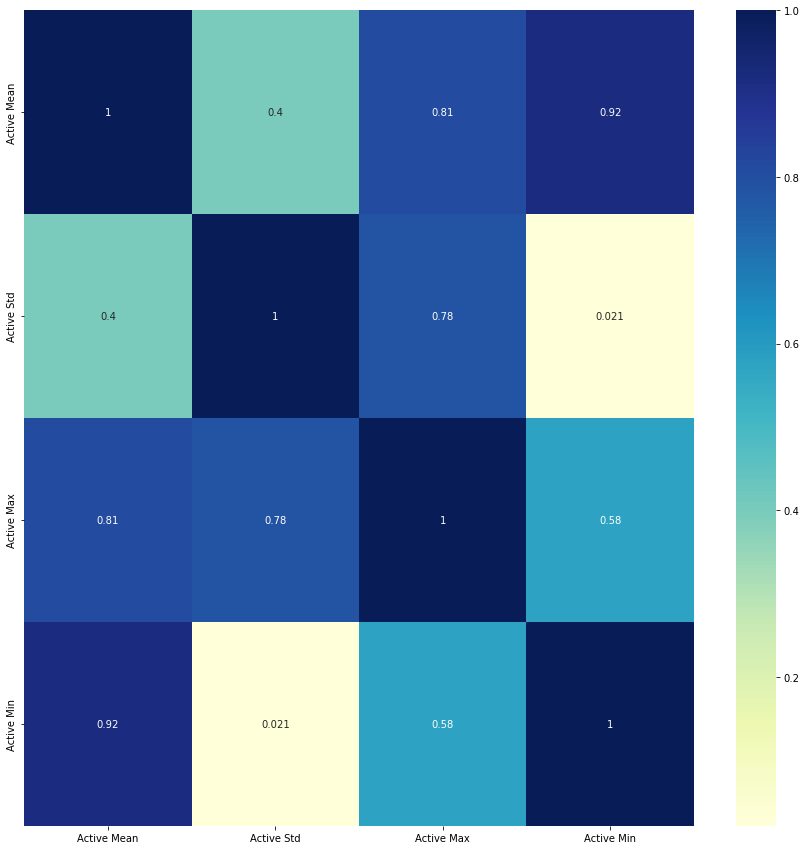

In [63]:
# Check correlation in aggregated count columns
cols = [x for x in df.columns if 'Active' in x]

plot_corr(cols)

In [64]:
cols_to_drop= ['Active Max','Active Min','Active Mean']
drop_cols(cols_to_drop)

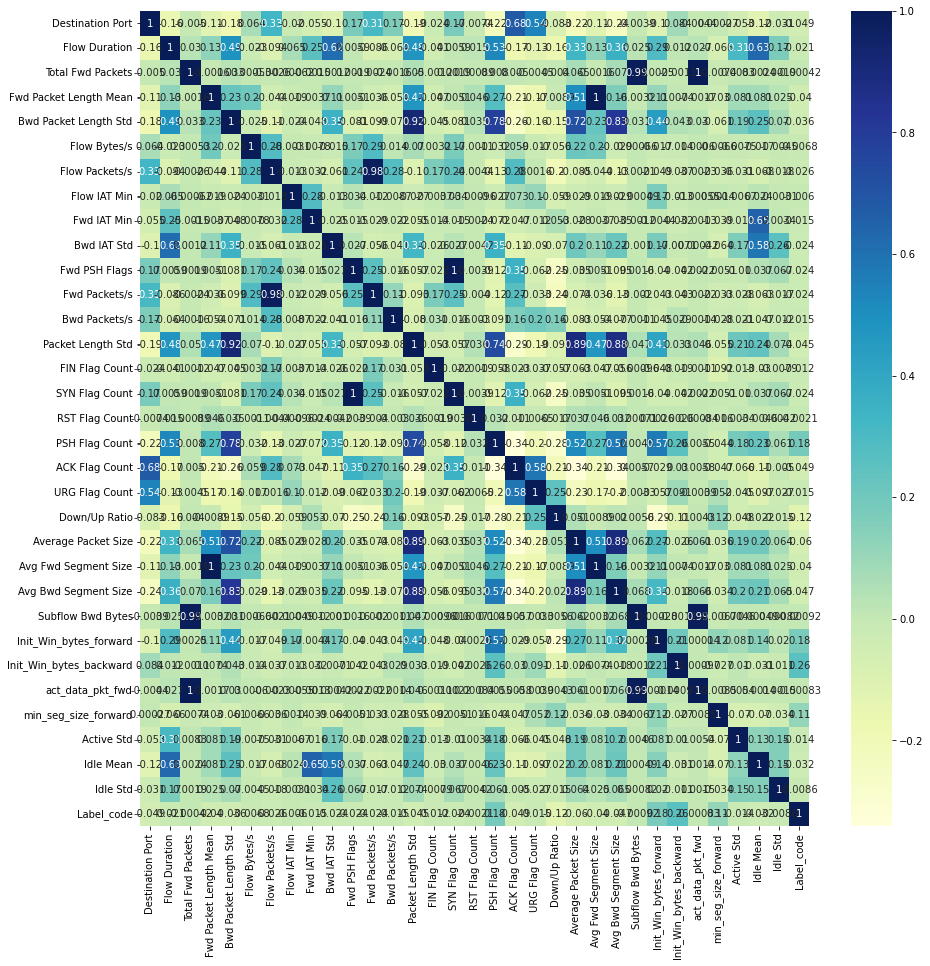

In [65]:
plot_corr(features)

In [66]:
cols_to_drop= ['Subflow Bwd Bytes','act_data_pkt_fwd','Average Packet Size']
drop_cols(cols_to_drop)

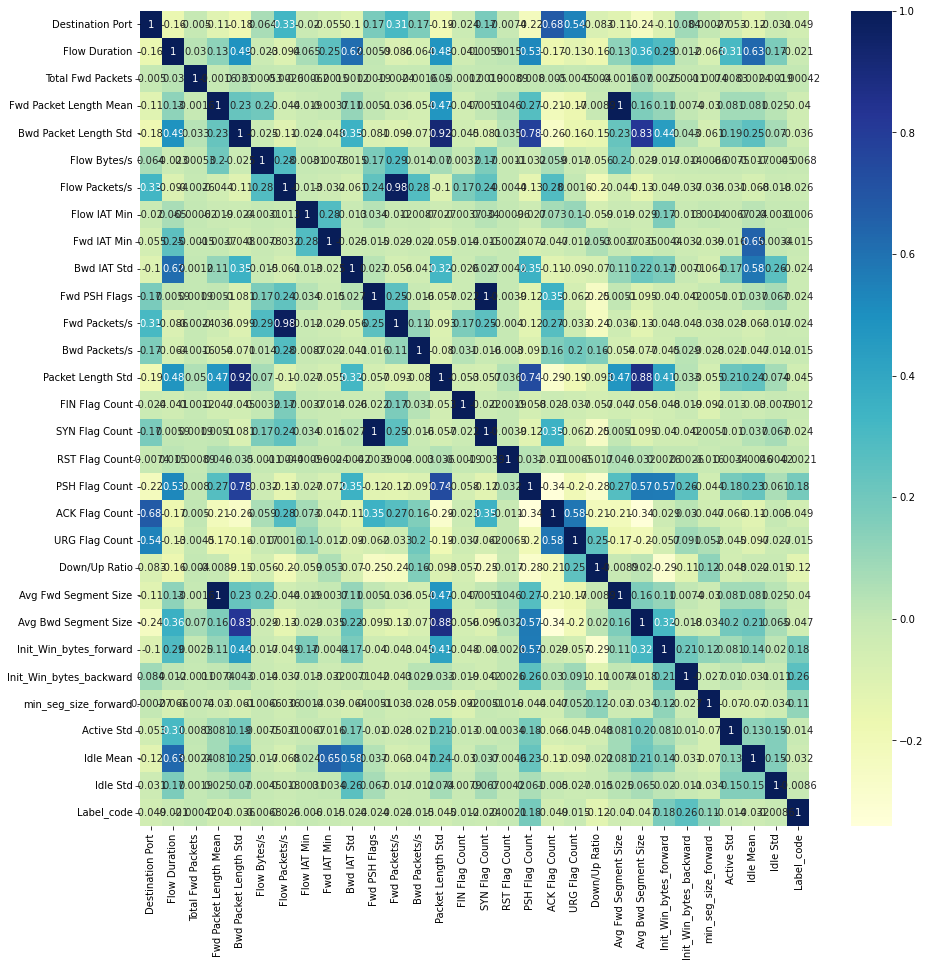

In [67]:
plot_corr(features)

In [68]:
cols_to_drop = ['Packet Length Std','Idle Mean','Fwd Packets/s','Bwd Packet Length Std']
drop_cols(cols_to_drop)

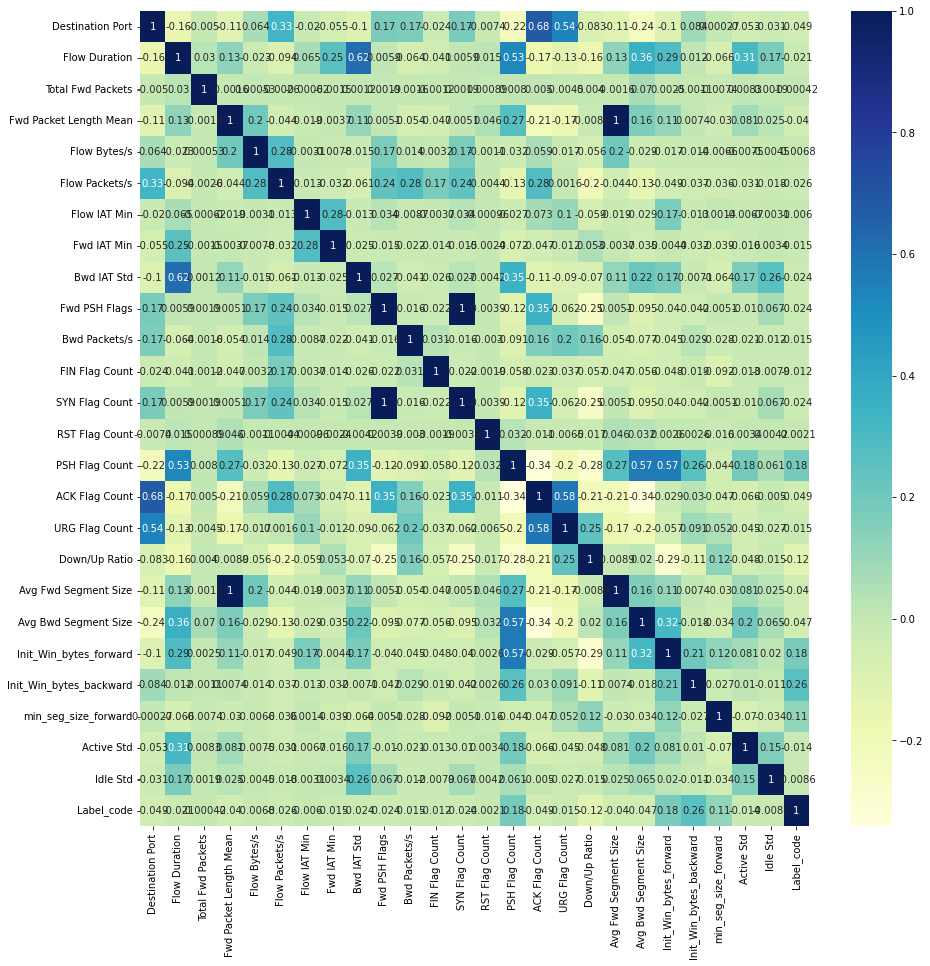

In [69]:
plot_corr(features)

In [70]:
cols_to_drop =['SYN Flag Count','Avg Fwd Segment Size']
drop_cols(cols_to_drop)

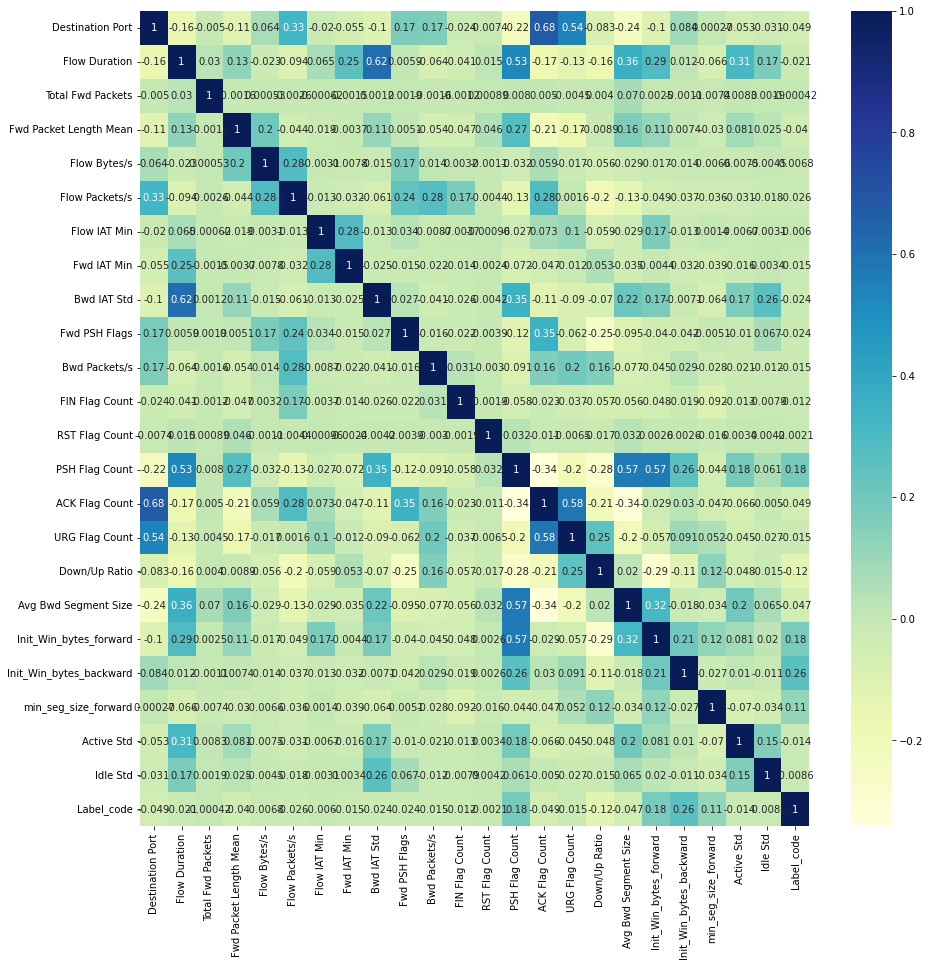

In [71]:
plot_corr(features)

In [72]:
features

['Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Fwd Packet Length Mean',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Min',
 'Fwd IAT Min',
 'Bwd IAT Std',
 'Fwd PSH Flags',
 'Bwd Packets/s',
 'FIN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'URG Flag Count',
 'Down/Up Ratio',
 'Avg Bwd Segment Size',
 'Init_Win_bytes_forward',
 'Init_Win_bytes_backward',
 'min_seg_size_forward',
 'Active Std',
 'Idle Std',
 'Label',
 'Label_code']

In [73]:
len(features)

25

##### Get data with non-redundant features for modeling

Observation : input data features were reduced from 78 to 23

In [74]:
model_df = df[features]
del df

In [75]:
model_df.head(3)

Destination Port  Flow Duration  Total Fwd Packets  Fwd Packet Length Mean  \
0               389      113095465                 48              201.416667   
1               389      113473706                 68              167.117647   
2                 0      119945515                150                0.000000   

   Flow Bytes/s  Flow Packets/s  Flow IAT Min  Fwd IAT Min  Bwd IAT Std  \
0    174.012282        0.636630             3            3  7084368.263   
1    212.225377        0.951762             2            2  5922355.273   
2      0.000000        1.250568             0            0        0.000   

   Fwd PSH Flags  ...  URG Flag Count  Down/Up Ratio  Avg Bwd Segment Size  \
0              1  ...               0              0            417.166667   
1              1  ...               0              0            317.950000   
2              0  ...               0              0              0.000000   

   Init_Win_bytes_forward  Init_Win_bytes_backward  min_seg_size_forward  \
0                     571                     2079                    32   
1                     390                     2081                    32   
2                      -1                       -1                     0   

     Active Std      Idle Std   Label  Label_code  
0  5.758373e+05  4.277541e+06  BENIGN         0.0  
1  5.034269e+05  4.229413e+06  BENIGN         0.0  
2  1.170000e+07  2.430000e+07  BENIGN         0.0  

[3 rows x 25 columns]

#####  Reduced data Information

In [76]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170366 entries, 0 to 170365
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Destination Port         170366 non-null  int64  
 1   Flow Duration            170366 non-null  int64  
 2   Total Fwd Packets        170366 non-null  int64  
 3   Fwd Packet Length Mean   170366 non-null  float64
 4   Flow Bytes/s             170366 non-null  float64
 5   Flow Packets/s           170366 non-null  float64
 6   Flow IAT Min             170366 non-null  int64  
 7   Fwd IAT Min              170366 non-null  int64  
 8   Bwd IAT Std              170366 non-null  float64
 9   Fwd PSH Flags            170366 non-null  int64  
 10  Bwd Packets/s            170366 non-null  float64
 11  FIN Flag Count           170366 non-null  int64  
 12  RST Flag Count           170366 non-null  int64  
 13  PSH Flag Count           170366 non-null  int64  
 14  ACK 

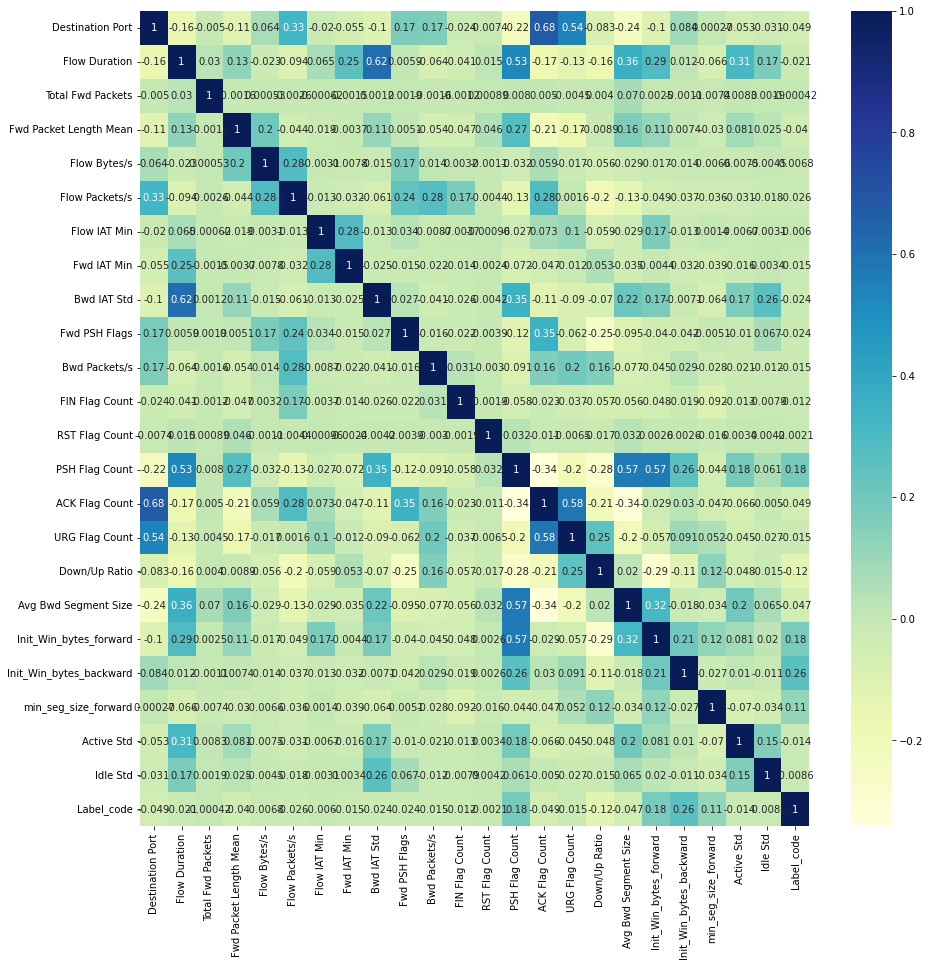

In [77]:
plot_corr(features, model_df)

In [78]:
def show_distribution(columns: list = features, df: pd.DataFrame = model_df, label: str = 'Label_code'):
    '''
        This function shows the distribution for features in dataset using a histogram color coded based on the label.
        columns : list of feature column names to make box plots for in the dataframe
        df: dataframe
        label: target column name
        
    '''
    f = df[df[label] == 1]
    nf = df[df[label] == 0]

    cols = 4
    row = len(columns)//2+1
    plt.figure(figsize=(18,row*5))
                      
    for col in columns:
        plt.subplot(row,cols,columns.index(col)+1)
        plt.title(col)
        plt.hist([f[col],nf[col]],color=['red','green'],bins=50, label=['Web Attacks', 'Benign'])
        plt.legend()
    plt.show()
    del f, nf
                      
                      
def show_outliers(features: list, df: pd.DataFrame = model_df):
    '''
        This function shows outliers for features in dataset using a box plot.
        features : list of feature column names to make box plots for in the dataframe
        df: dataframe
        
    '''
    cols = 2
    row = len(features)//2+1
    plt.figure(figsize=(20,row*5))
    for col in features:
        plt.subplot(row,cols,features.index(col)+1)
        plt.title(col)
        plt.boxplot(df[col])
    plt.show()

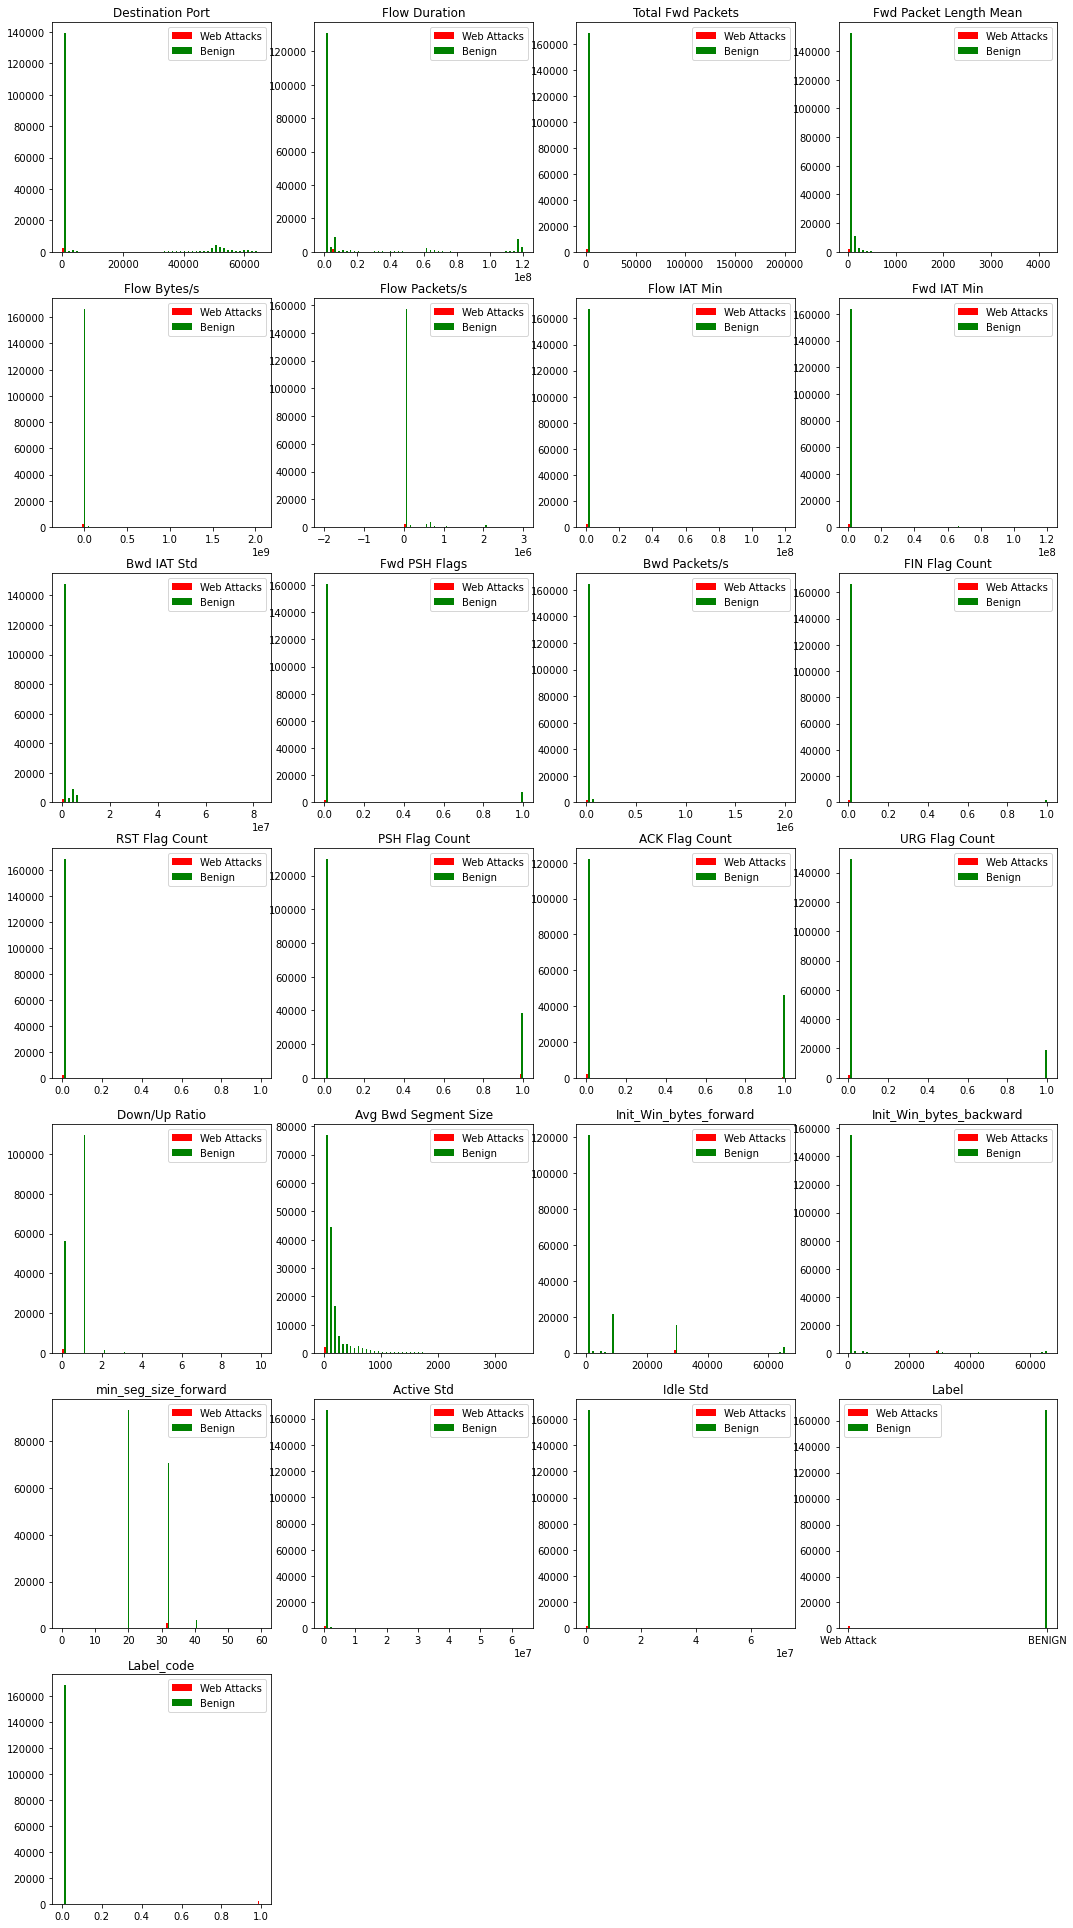

In [79]:
show_distribution(df=model_df)

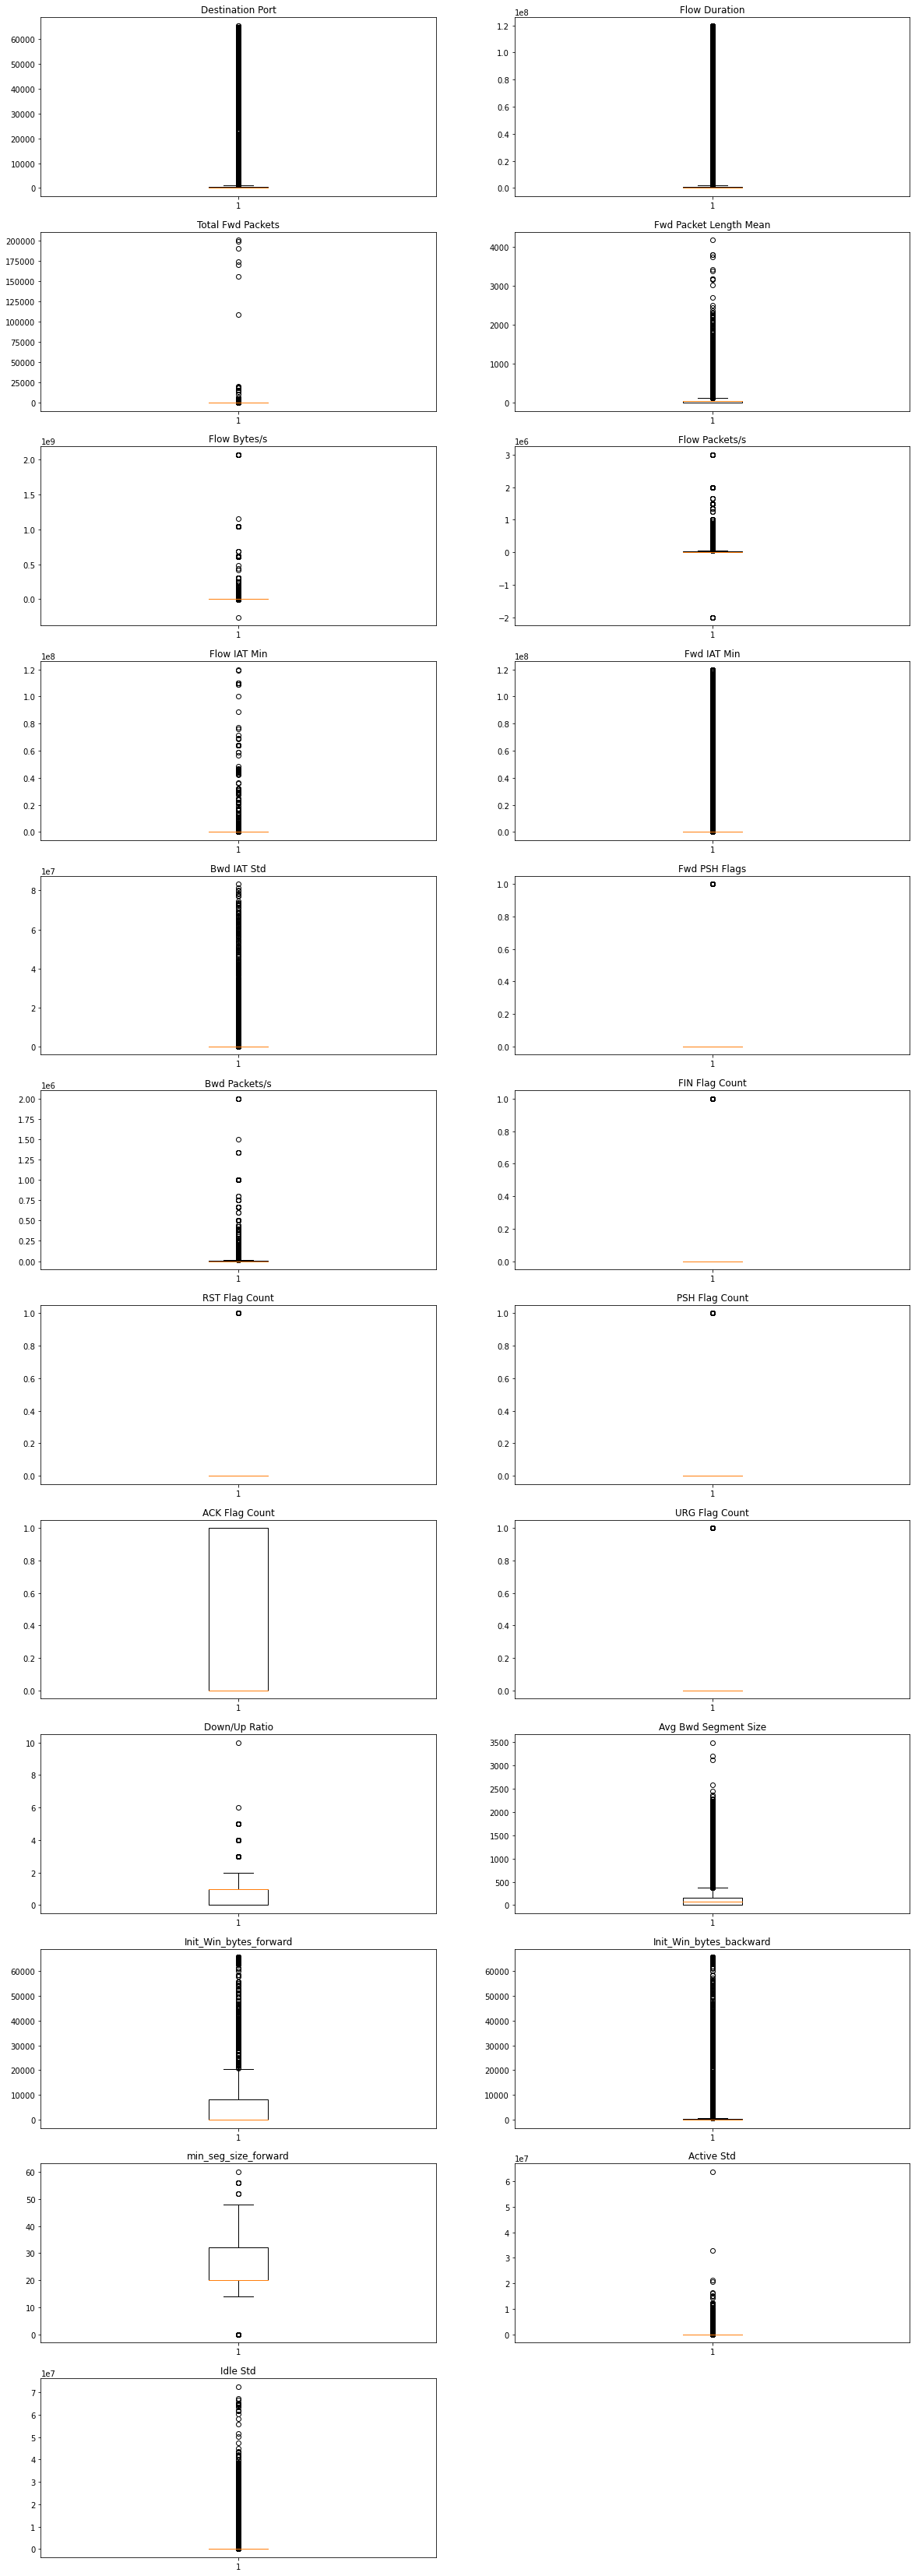

In [80]:
columns = features.copy()
columns.remove('Label')
columns.remove('Label_code')
show_outliers(columns, X)
del columns

##### Get input data Features and Target

In [81]:
# Get Feature names
features = model_df.columns.to_list()
features.remove('Label')
features.remove('Label_code')
features

['Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Fwd Packet Length Mean',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Min',
 'Fwd IAT Min',
 'Bwd IAT Std',
 'Fwd PSH Flags',
 'Bwd Packets/s',
 'FIN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'URG Flag Count',
 'Down/Up Ratio',
 'Avg Bwd Segment Size',
 'Init_Win_bytes_forward',
 'Init_Win_bytes_backward',
 'min_seg_size_forward',
 'Active Std',
 'Idle Std']

In [82]:
X = model_df[features]
Y = model_df['Label_code']
del model_df

##### Normalizing

Scaling to significantly reduce feature data scale. Robust Scaler is used to scale features using statistics that are robust to outliers has it has been observed from the dataset that some columns have large outliers.

In [83]:
scaler = RobustScaler()

scaled = scaler.fit_transform(X)

In [84]:
scaledX = pd.DataFrame(scaled, columns=features)

##### Compare Scaled and Original Dataset using Scatter plot on 2 columns

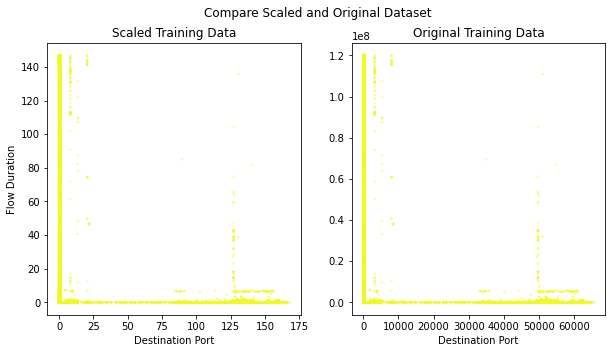

In [85]:
cmap = getattr(cm, "plasma_r", cm.hot_r)
colors = cmap(Y) 

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
fig.suptitle('Compare Scaled and Original Dataset')

# Plot Scatter plot for Scaled Data for columns: Destination Port and Flow duration
ax1.scatter(scaledX[['Destination Port']], scaledX[['Flow Duration']], alpha=0.5, marker="o", s=5, lw=0, c=colors)
ax1.set_title('Scaled Training Data')
ax1.set(xlabel='Destination Port', ylabel='Flow Duration')

# Plot Scatter plot for Original Data for columns: Destination Port and Flow duration
ax2.scatter(X[['Destination Port']], X[['Flow Duration']], alpha=0.5, marker="o", s=5, lw=0, c=colors)
ax2.set_title('Original Training Data')
ax2.set(xlabel='Destination Port')

fig.show()

##### Split scaled dataset into train and test set
Set stratify=Y because the target values are not evenly distributed

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(scaledX,Y,test_size=0.2,random_state=0, stratify=Y)

#### Experiment 3 - Model Fittig on Reduced Dataset

This project is a classification problem as we're trying to predict the class of a web flow as Harmless or Web Attack. Four popular classification algorithms will be used for experimentation: 
 - Scikit-learn Decision Tree Classifier
 - Scikit-learn Random Forest Classifier
 - Scikit-learn Logistic Regressor

Our focus target value (web attack,1) is about 1/39 of all target values. For this reason, class weights will be used in model training to improve model accuracy.

For this project, the aim is to predict correctly if a Network flow is a Webattack.
So the accuracy metric for model selection will be recall. High recall means low false negatives

Defining recall with respect to this project: Recall gives the fraction of network flows correcly identified as web attacks out of all web attacks. 

Mathematically,
###### <center>  Recall = True Positive / (True Positive + False Negative ) </center>

 

In [87]:
# To create a results dataframe to save and compare results for each ML model
results = pd.DataFrame()
results['Metrics'] = ['True Negatives', 'False Negatives', 'False Positives', 'True Positives', 'Accuracy',\
                      'Precision', 'Recall', 'F1-Score', 'Support']
results['Experiment'] = 'Experiment 3'


In [88]:
b_time = ['runtime(sec)']

##### Ensemble Modelling using Random Forest

In [89]:
RFclassifier2 = RandomForestClassifier(n_estimators = 100,criterion= 'entropy',class_weight='balanced_subsample')

# Initialize time counter
start = dt.now()

#Fitting Random forest classification to training set
RFclassifier2.fit(X_train, Y_train)

buildtime = (dt.now() - start).seconds

In [90]:
# Predicting Test set results
Y_pred_rf2 = RFclassifier2.predict(X_test)

# Evaluate model
print(f'Random Forest Accuracy score: {round(accuracy_score(Y_test, Y_pred_rf2),4)}')

print(classification_report(Y_test, Y_pred_rf2))

Random Forest Accuracy score: 0.9998
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33638
         1.0       1.00      0.99      0.99       436

    accuracy                           1.00     34074
   macro avg       1.00      0.99      1.00     34074
weighted avg       1.00      1.00      1.00     34074



In [91]:
results['Random Forest'] = get_accuracy_metrics(Y_test, Y_pred_rf2)

In [92]:
b_time.append(buildtime)

#### Decision Tree Classifier

In [93]:
DTclassifier = DecisionTreeClassifier(criterion='entropy', random_state=0, class_weight='balanced')

start = dt.now()

# Fitting Decision Tree Algorithm to Training set
DTclassifier.fit(X_train, Y_train)

buildtime = (dt.now() - start).seconds

In [94]:
#Predict Target values for test features
Y_pred_dt = DTclassifier.predict(X_test)

# Evaluate model
print(f'Decision Tree Accuracy score: {round(accuracy_score(Y_test, Y_pred_dt),4)}')
print(classification_report(Y_test, Y_pred_dt))

Decision Tree Accuracy score: 0.9999
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33638
         1.0       1.00      1.00      1.00       436

    accuracy                           1.00     34074
   macro avg       1.00      1.00      1.00     34074
weighted avg       1.00      1.00      1.00     34074



In [95]:
results['Decision Tree'] = get_accuracy_metrics(Y_test, Y_pred_dt)
b_time.append(buildtime)

#### Logistic Regression Model

In [96]:
LRclassifier = LogisticRegression(random_state = 0, solver = 'lbfgs', class_weight='balanced')

start = dt.now()
# Fitting Logist regression Algorithm to Training set
LRclassifier.fit(X_train, Y_train)

buildtime = (dt.now() - start).seconds

In [97]:
# Predict
Y_pred_lr = LRclassifier.predict(X_test)

# Evaluate model
print(f'Logistic Regression Accuracy score: {round(accuracy_score(Y_test, Y_pred_lr),4)}')

print(classification_report(Y_test, Y_pred_lr))

Logistic Regression Accuracy score: 0.8743
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93     33638
         1.0       0.08      0.84      0.15       436

    accuracy                           0.87     34074
   macro avg       0.54      0.86      0.54     34074
weighted avg       0.99      0.87      0.92     34074



In [98]:
results['Logistic Regression'] = get_accuracy_metrics(Y_test, Y_pred_lr)
b_time.append(buildtime)

In [99]:
b_time

['runtime(sec)', 17, 1, 3]

#### Training Results

Observation: XG Boost model performed the best with the highest accuracy and recall

In [100]:
results

Metrics    Experiment Random Forest Decision Tree  \
0   True Negatives  Experiment 3         33638         33636   
1  False Negatives  Experiment 3             0             2   
2  False Positives  Experiment 3             6             2   
3   True Positives  Experiment 3           430           434   
4         Accuracy  Experiment 3      0.999824      0.999883   
5        Precision  Experiment 3           1.0      0.995413   
6           Recall  Experiment 3      0.986239      0.995413   
7         F1-Score  Experiment 3      0.993072      0.995413   
8          Support  Experiment 3          None          None   

  Logistic Regression  
0               29424  
1                4214  
2                  69  
3                 367  
4            0.874303  
5            0.080114  
6            0.841743  
7            0.146303  
8                None

In [101]:
experiment2

Metrics    Experiment Random Forest Decision Tree  \
0   True Negatives  Experiment 2         33636         33635   
1  False Negatives  Experiment 2             2             3   
2  False Positives  Experiment 2             6             1   
3   True Positives  Experiment 2           430           435   
4         Accuracy  Experiment 2      0.999765      0.999883   
5        Precision  Experiment 2       0.99537      0.993151   
6           Recall  Experiment 2      0.986239      0.997706   
7         F1-Score  Experiment 2      0.990783      0.995423   
8          Support  Experiment 2          None          None   

  Logistic Regression  
0               32762  
1                 876  
2                   6  
3                 430  
4            0.974115  
5             0.32925  
6            0.986239  
7            0.493685  
8                None

##### Visualize model performace using ROC curve

In [102]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_lr)
fpr2, tpr2, thresholds2 = roc_curve(Y_test, Y_pred_dt)
fpr4, tpr4, thresholds4 = roc_curve(Y_test, Y_pred_rf2)

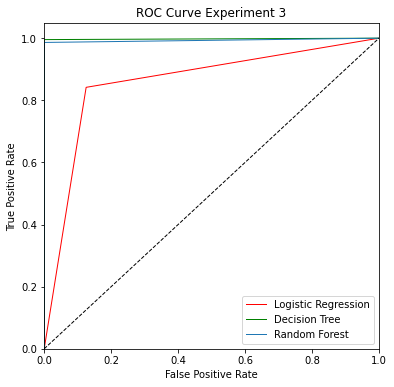

In [103]:
plt.rcParams['figure.figsize'] = (6, 6)
plt.figure()
plt.plot(fpr,tpr,color='r',lw=1,label='Logistic Regression')
plt.plot(fpr2,tpr2,color='g',lw=1,label='Decision Tree')
plt.plot(fpr4,tpr4,lw=1,label='Random Forest')
plt.plot([0,1],[0,1],color='k',lw=1,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Experiment 3')
plt.legend(loc="lower right")
plt.show()



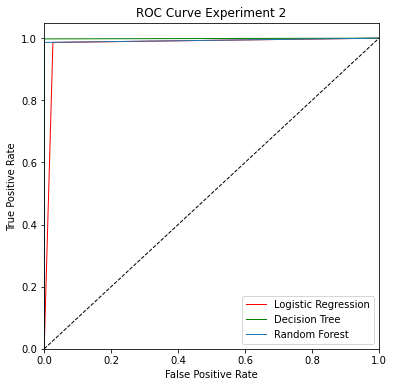

In [104]:
plt.rcParams['figure.figsize'] = (6, 6)
plt.figure()
plt.plot(fp,tp,color='r',lw=1,label='Logistic Regression')
plt.plot(fp2,tp2,color='g',lw=1,label='Decision Tree')
plt.plot(fp4,tp4,lw=1,label='Random Forest')
plt.plot([0,1],[0,1],color='k',lw=1,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Experiment 2')
plt.legend(loc="lower right")
plt.show()

In [105]:
exp = pd.concat([experiment2,results])

##### Compare Experiment Results

In [106]:
exp.drop(index=[8]).set_index(['Experiment', 'Metrics'])

Random Forest Decision Tree Logistic Regression
Experiment   Metrics                                                        
Experiment 2 True Negatives          33636         33635               32762
             False Negatives             2             3                 876
             False Positives             6             1                   6
             True Positives            430           435                 430
             Accuracy             0.999765      0.999883            0.974115
             Precision             0.99537      0.993151             0.32925
             Recall               0.986239      0.997706            0.986239
             F1-Score             0.990783      0.995423            0.493685
Experiment 3 True Negatives          33638         33636               29424
             False Negatives             0             2                4214
             False Positives             6             2                  69
             True Positives            430           434                 367
             Accuracy             0.999824      0.999883            0.874303
             Precision                 1.0      0.995413            0.080114
             Recall               0.986239      0.995413            0.841743
             F1-Score             0.993072      0.995413            0.146303